In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [63]:
df=pd.read_csv("stud.csv")

In [64]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [65]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [66]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing values

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [68]:
df.duplicated().sum()

np.int64(0)

In [69]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


EXPLORING dATA
1.FINDING UNIQUE ITEMS


In [70]:
print("Categories in 'gender' variables: ",end=" ")
print(df["gender"].unique())

print("Categories in 'race_ethnicity' variables: ",end=" ")
print(df["race_ethnicity"].unique())

print("Categories in 'parental_level_of_education' variables: ",end=" ")
print(df["parental_level_of_education"].unique())

print("Categories in 'lunch' variables: ",end=" ")
print(df["lunch"].unique())

print("Categories in 'test_preparation_course' variables: ",end=" ")
print(df["test_preparation_course"].unique())


Categories in 'gender' variables:  ['female' 'male']
Categories in 'race_ethnicity' variables:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variables:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variables:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variables:  ['none' 'completed']


In [71]:
numeric_features=[feature for feature in df.columns if df[feature].dtype !="O"]
categorical_features=[feature for feature in df.columns if df[feature].dtype =="O"]

print("we have {} numerical features:{}".format(len(numeric_features),numeric_features))
print("we have {} categorical features:{}".format(len(categorical_features),categorical_features))

we have 3 numerical features:['math_score', 'reading_score', 'writing_score']
we have 5 categorical features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding scores to get totalscore and avg

In [72]:
df["total_score"]=df["math_score"]+df["reading_score"]+df["writing_score"]
df["average_score"]=df["total_score"]/3

In [73]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [74]:
df[df["math_score"] == 100].shape


(7, 10)

In [75]:
(df["math_score"] == 100).sum()


np.int64(7)

For finding the marks full(100)and <=20(pass mark)

In [76]:
math_score_full=df[df["math_score"] == 100]["average_score"].count()
writing_score_full=df[df["writing_score"] == 100]["average_score"].count()
reading_score_full=df[df["reading_score"] == 100]["average_score"].count()

print(f"Number of students with full mark in Maths :{math_score_full}")
print(f"Number of students with full mark in Maths :{writing_score_full}")
print(f"Number of students with full mark in Maths :{reading_score_full}")

Number of students with full mark in Maths :7
Number of students with full mark in Maths :14
Number of students with full mark in Maths :17


In [77]:
math_score_full=df[df["math_score"] <=20]["average_score"].count()
writing_score_full=df[df["writing_score"] <=20]["average_score"].count()
reading_score_full=df[df["reading_score"] <=20]["average_score"].count()

print(f"Number of students with full mark in Maths :{math_score_full}")
print(f"Number of students with full mark in Maths :{writing_score_full}")
print(f"Number of students with full mark in Maths :{reading_score_full}")

Number of students with full mark in Maths :4
Number of students with full mark in Maths :3
Number of students with full mark in Maths :1


# ANALYTICS
---------------------------x---------------------------------------x-----------------------------------------x------------------------x----------------


### 📊- Histogram: Visual Representation of Score Distribution
1.His Plot: Gender-Based Academic Performance Analysis
- Visualizing average scores by gender to identify which group performs better academically.



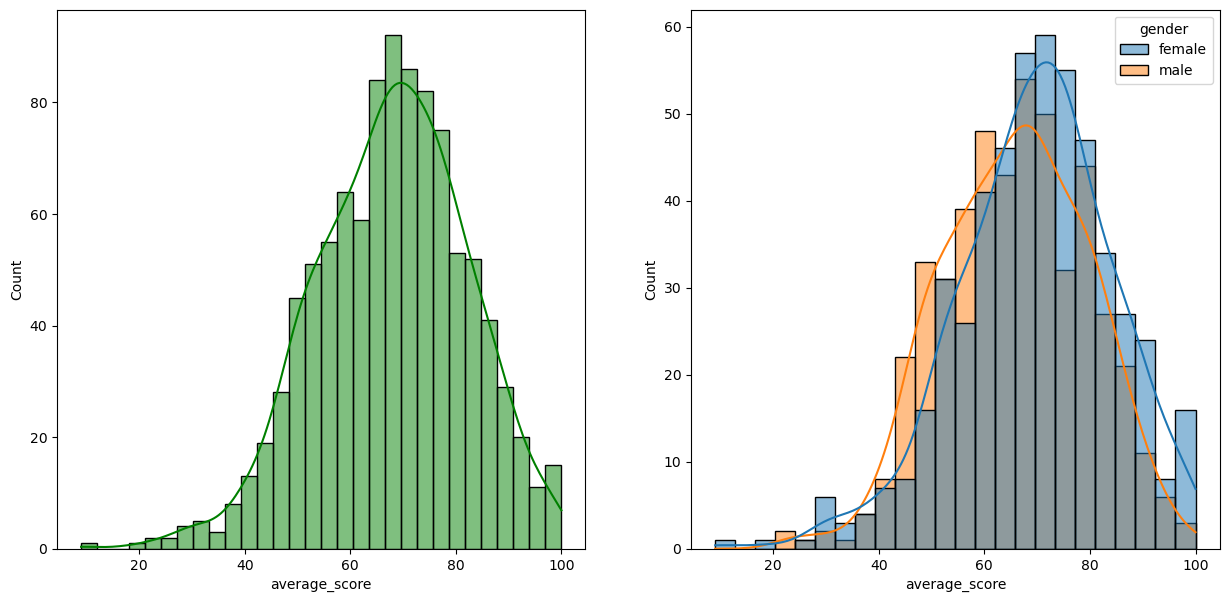

In [78]:
fig , axs =plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

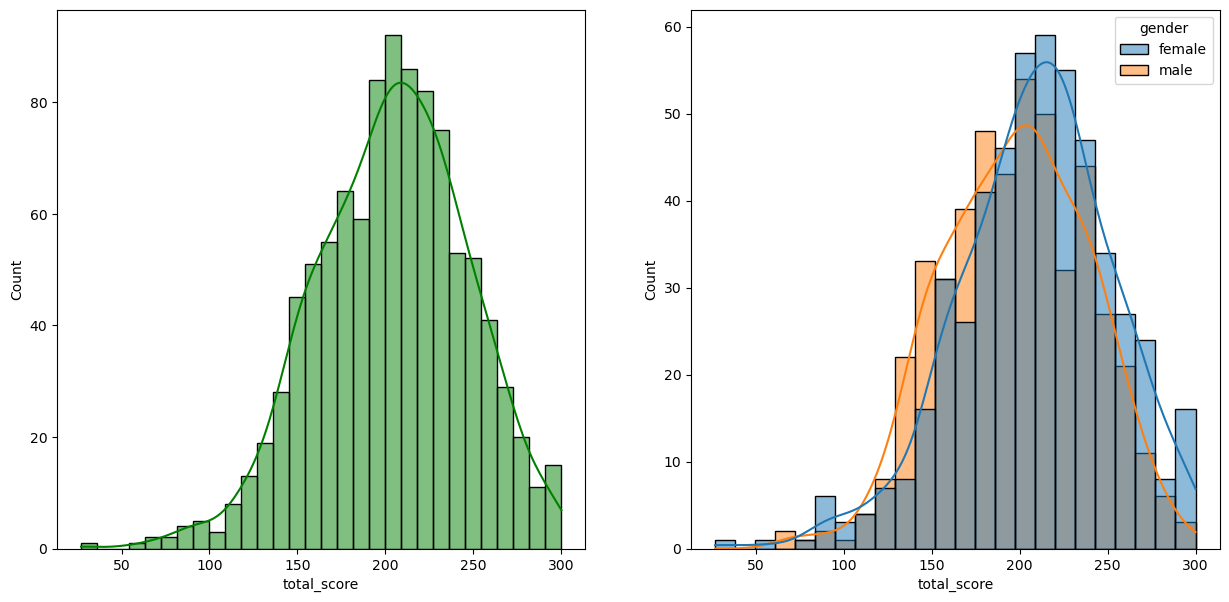

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

# InsightS
1. The graphs clearly indicate that females consistently achieve higher scores than males.  
2. This suggests that females outperform males academically.

------------------------------------------------------------------------------------------------------------------

### 📊- BoxPlot: Visual Representation of Score Distribution
- Box Plot: Effect of lunch on marks
- - This box plot compares the distribution of total academic scores between students who receive standard lunch and those who receive free/reduced-price lunch. 

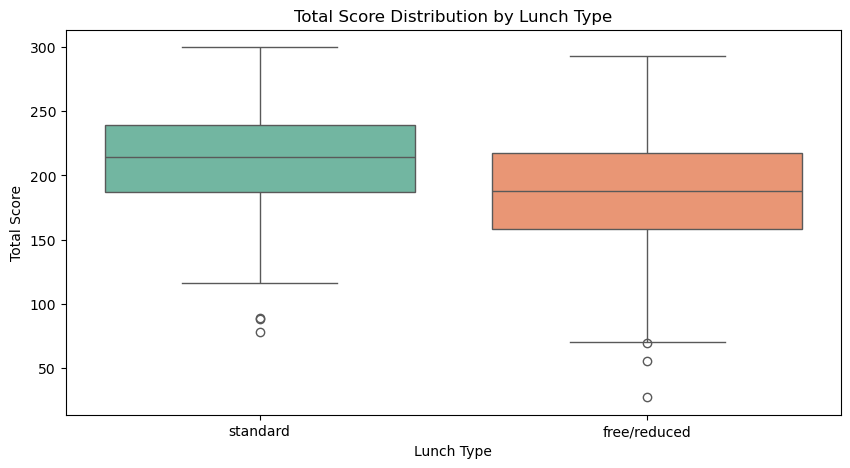

In [80]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="lunch", y="total_score", data=df, hue="lunch", palette="Set2")
plt.title("Total Score Distribution by Lunch Type")
plt.xlabel("Lunch Type")
plt.ylabel("Total Score")
plt.show()

# InsightS
1. The graphs clearly indicate that students with standard lunch perform much better than those with free/reduced lunch.
2. Lunch quality (as a proxy for nutrition) is directly proportional to academic performance—students with better nutrition tend to achieve higher scores.

------------------------------------------------------------------------------------------------------------------

# ◔ PIE-plot
- Demographic Breakdown of Student Population
- - This section presents the distribution of key student characteristics using pie charts, including gender, parental education level, race/ethnicity, test preparation course completion, and lunch type. These visuals help identify demographic patterns and potential factors influencing academic performance.

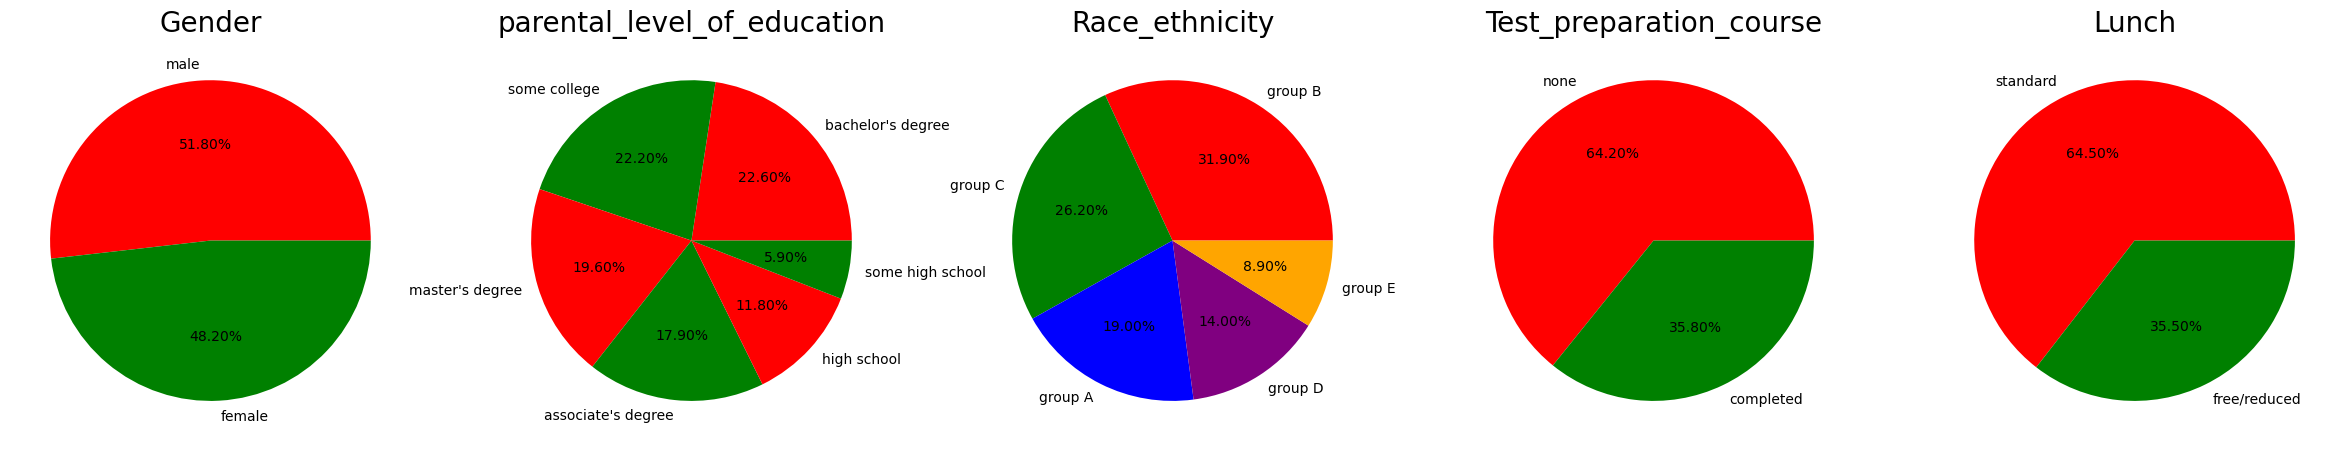

In [81]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(151)
size=df['gender'].value_counts()
labels='male','female'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct="%0.2f%%")
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.rcParams['figure.figsize']=(30,12)
plt.subplot(152)
size=df['parental_level_of_education'].value_counts()
labels="bachelor's degree", 'some college', "master's degree","associate's degree", 'high school', 'some high school'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct="%0.2f%%")
plt.title('parental_level_of_education',fontsize=20)
plt.axis('off')

plt.rcParams['figure.figsize']=(30,12)
plt.subplot(153)
size=df['race_ethnicity'].value_counts()
labels='group B', 'group C', 'group A', 'group D', 'group E'
color=['red','green','blue','purple','orange']
plt.pie(size,colors=color,labels=labels,autopct="%0.2f%%")
plt.title('Race_ethnicity',fontsize=20)
plt.axis('off')

plt.rcParams['figure.figsize']=(30,12)
plt.subplot(154)
size=df['test_preparation_course'].value_counts()
labels='none', 'completed'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct="%0.2f%%")
plt.title('Test_preparation_course',fontsize=20)
plt.axis('off')

plt.rcParams['figure.figsize']=(30,12)
plt.subplot(155)
size=df['lunch'].value_counts()
labels='standard', 'free/reduced'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct="%0.2f%%")
plt.title('Lunch',fontsize=20)
plt.axis('off')


plt.show()

# Insights
🚹 Gender
1. Females make up 48.2% of the student population, while males account for 51.8%, indicating a near-even gender split.
2. Slight male majority suggests balanced 

🎓 Parental Level of Education
1. The largest group (22.60%) has parents with a bachelor’s degree, followed closely by those with some college (22.20%) — suggesting moderate to high parental education levels overall.
2. Only 5.90% have parents with some high school — indicating low parental education is rare in this dataset, which may correlate with higher academic outcomes.

🌍 Race/Ethnicity
1. Group B (31.90%) is the largest ethnic group, followed by Group C (26.20%) and Group A (19.00%), showing diversity with no single dominant group.
2. Smaller groups like Group E (8.90%) and Group D (14.00%) may warrant deeper analysis to ensure equitable outcomes across all racial/ethnic backgrounds.

📚 Test Preparation Course
1. Over 64% of students did not complete a test prep course, suggesting most rely on school-based learning rather than external support.
2. Students who completed the course (35.80%) may show improved performance — worth comparing their scores against non-completers to measure impact.

🍽️ Lunch (Nutrition Proxy)
1. Majority (64.50%) receive standard lunch, implying better access to nutrition compared to 35.50% on free/reduced lunch.
2. This gap may reflect socioeconomic differences — and as seen in other analyses, students with standard lunch tend to score higher, hinting at nutrition’s role in academic success.


------------------------------------------------------------------------------------------------------------------

In [105]:
gender_grouped = df.groupby('gender')[['math_score','reading_score','writing_score',"average_score"]].mean()
gender_grouped

,math_score,reading_score,writing_score,average_score
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


# 📊 Boxplots: Comparing Academic Performance Across Key Groups
Visualizing how student scores vary by gender grouped with reading_score, writing_score,math_score, and average_score. These plots reveal performance gaps, outliers, and trends that help identify which groups may need targeted support.

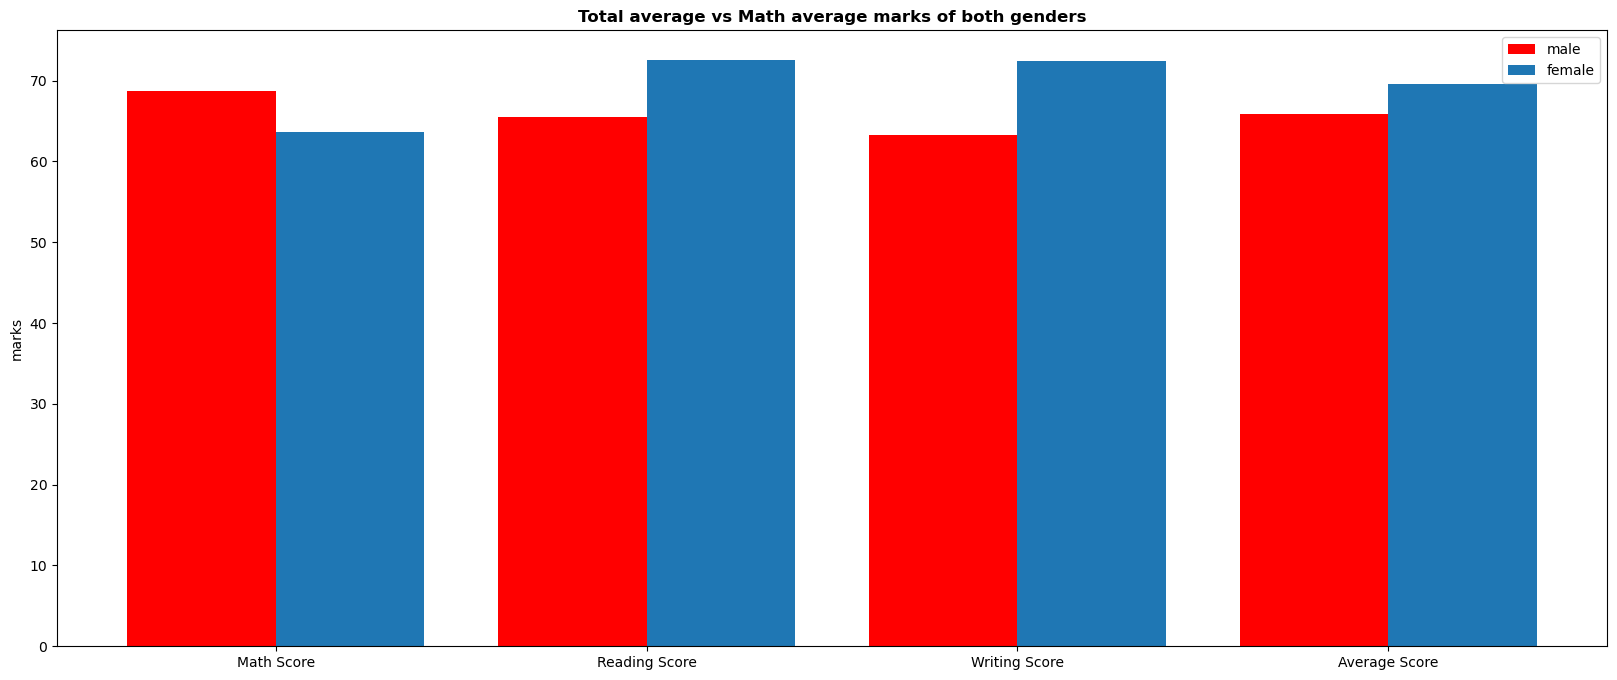

In [118]:
plt.figure(figsize=(20,8))
x=['Math Score','Reading Score','Writing Score',"Average Score"]
male_score=[gender_grouped.loc["male",'math_score'],
              gender_grouped.loc["male",'reading_score'],
              gender_grouped.loc["male",'writing_score'],
              gender_grouped.loc["male",'average_score']]

female_score=[gender_grouped.loc["female",'math_score'],
              gender_grouped.loc["female",'reading_score'],
              gender_grouped.loc["female",'writing_score'],
              gender_grouped.loc["female",'average_score']]
x_axis=np.arange(len(x))
plt.bar(x_axis-0.2,male_score,0.4,label="male",color="red")
plt.bar(x_axis+0.2,female_score,0.4,label="female",)

plt.xticks(x_axis,x)
plt.ylabel("marks")
plt.title("Total average vs Math average marks of both genders", fontweight='bold')
plt.legend()
plt.show() 

# Insights
📊 Math Score
1. Males score higher in Math than females (red > blue).
2. This suggests males may have a relative strength in math compared to females in this dataset.

📖 Reading Score
1. Females outperform males significantly in Reading (blue >> red).
2. Highlights a strong gender gap favoring females in reading comprehension or literacy.

✍️ Writing Score
1. Females score much higher in Writing than males (blue >> red).
2. Reinforces the trend that females tend to excel more in language-based subjects.

⚖️ Average Score (Overall)
1. Females have a higher overall average than males — despite lower math scores.
2. Shows that strengths in reading and writing outweigh the math gap, leading to better total performance.

------------------------------------------------------------

In [135]:
def add (a,b):
    return print(a+b)



In [136]:
result=add(10,5)
print(result)

15
None


In [84]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [85]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [86]:
# df[df["math_score"] == 100]

In [87]:
# dropcolumns=["math_score","reading_score","writing_score"]

# def drop_column(df,dropcolumns):
#     for col in dropcolumns:
#         df.drop(col,axis=1,inplace=True)


# drop_column(df,dropcolumns)

In [88]:
# df.head()